# 0.) Import and Clean data

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)

In [4]:
df = pd.read_csv("bank-additional-full (1).csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays", "previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

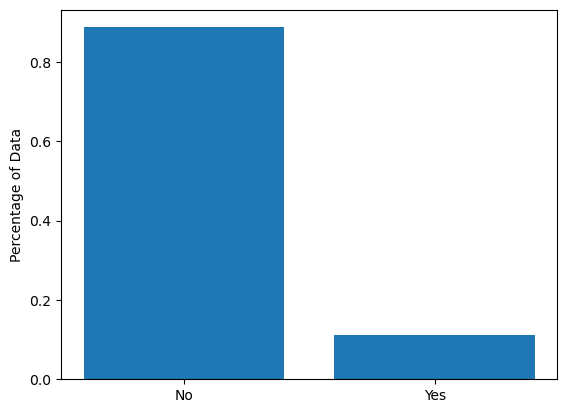

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
X.head()

,age,duration,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [12]:
X.columns

Index(['age', 'duration', 'loan_unknown', 'loan_yes', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'housing_unknown', 'housing_yes',
       'contact_telephone', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'campaign_2', 'campaign_3',
       'campaign_4', 'campaign_5', 'campaign_6', 'campaign_7', 'campaign_8',
       'campaign_9', 'campaign_10', 'campaign_11', 'campaign_12',
       'campaign_13', 'campaign_14', 'campaign_15', 'campaign_16',
       'campaign_17', 'campaign_18', 'campaign_19', 'campaign_20',
       'campaign_21', 'campaign_22', 'campaign_23', 'campaign_24',
       'campaign_25', 'campaign_26', 'campaign_27', 'campaign_28',
       'campaign_29', 'campaign_30', 'campaign_31', 'campaign_32',
       'campaign_33

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [13]:
###############
###TRANSFORM###
###############

#X_scaled = #???
#y_train = #???

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_scaled, y_train = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [14]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.169\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.495\ngini = 0.295\nsamples = 19877\nvalue = [16302, 3575]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.11\nsamples = 10478\nvalue = [9867, 611]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.09\nsamples = 10262\nvalue = [9776, 486]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.488\nsamples = 216\nvalue = [91, 125]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.32\ngini = 0.432\nsamples = 9399\nvalue = [6435, 2964]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.487\nsamples = 6835\nvalue = [3971, 2864]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.075\nsamples = 2564\nvalue = [2464, 100]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.417\nsamples = 31283\nvalue = [9278, 22005]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.712\ngini = 0.338\nsamples = 25652\nvalue = [5519, 20133]\nclass = 

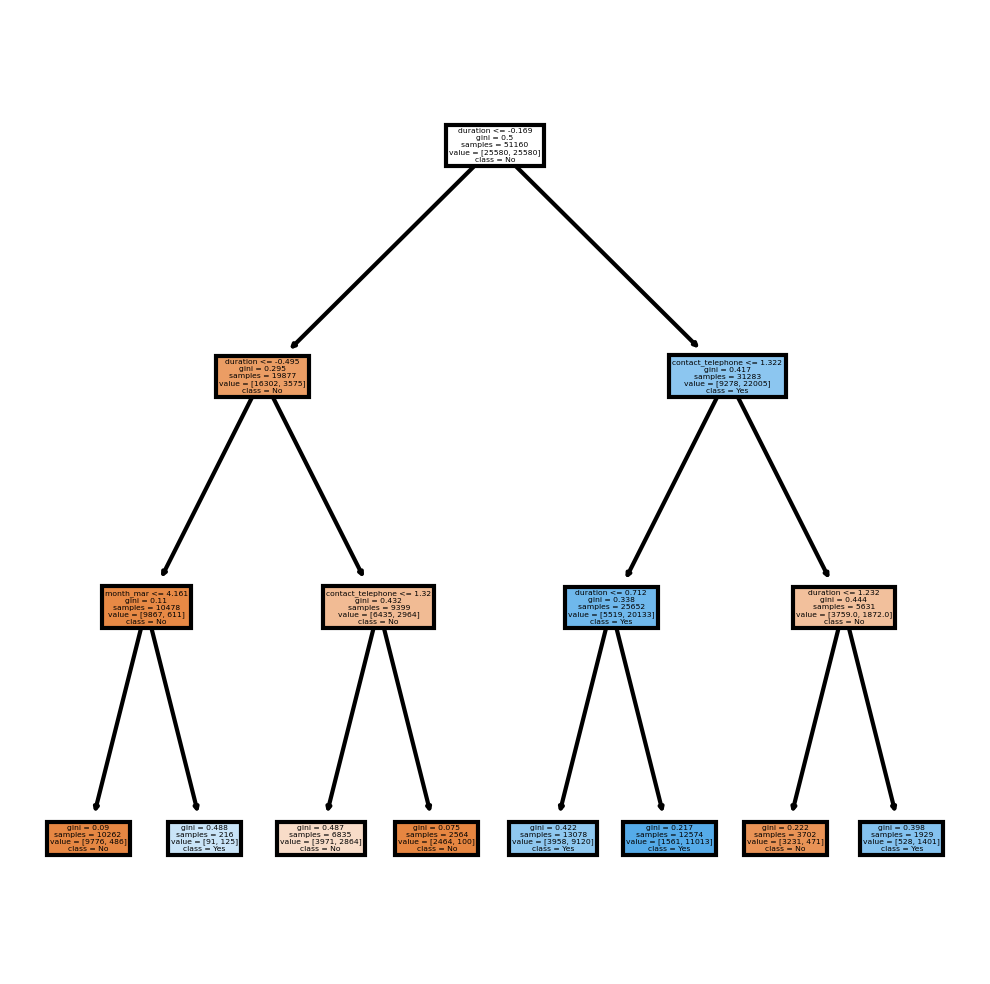

In [15]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])

#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [16]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

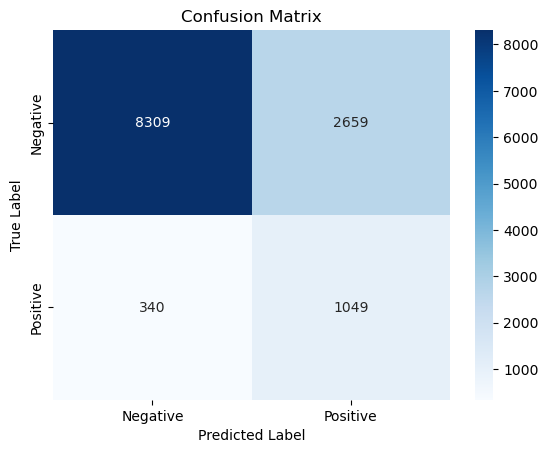

In [17]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [18]:
# optimize on Max Depth
dtree = DecisionTreeClassifier(max_depth = 3)

In [19]:
bagging = BaggingClassifier(estimator = dtree, 
                 n_estimators = 100, 
                 max_samples = .5, 
                 max_features = 1) # randomly choose a feature

bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

/Users/yuefanding/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

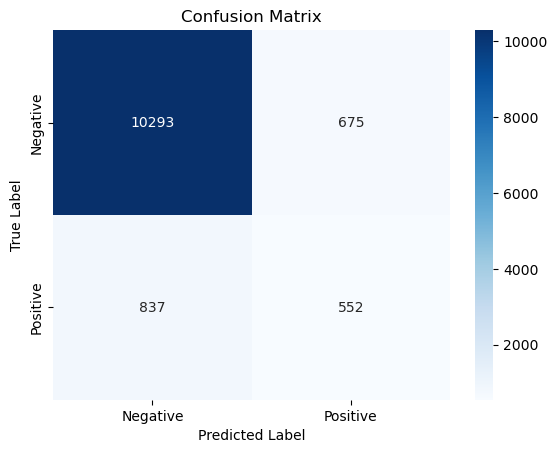

In [21]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
# optimize on Max Depth
dtree = DecisionTreeClassifier(max_depth = 3)

In [24]:
boost = AdaBoostClassifier(estimator = dtree, 
                 n_estimators = 100) # randomly choose a feature

boost.fit(X_scaled, y_train)

y_pred = boost.predict(X_test)

/Users/yuefanding/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yuefanding/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [25]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

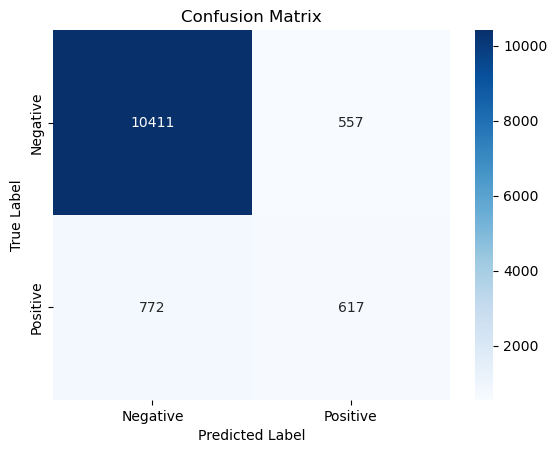

In [26]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#from mlens.ensemble import SuperLearner

In [28]:
# Train a a logistic regression on the decision tree, boosted tree, bagging tree
# 

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
#X_base_learners = [bagging.predict(X_train), boost.predict(X_train), dtree_main.predict(X_train)]

In [34]:
# Assuming bagging, boost, and dtree_main are your base models
predictions = [bagging.predict(X_scaled), boost.predict(X_scaled), dtree_main.predict(X_scaled)]

# Stack predictions horizontally to create a feature matrix for the super learner
# Each model's predictions become a column in the matrix
X_base_learners = np.column_stack(predictions)

# Now fit the super learner
super_learner = LogisticRegression()
super_learner.fit(X_base_learners, y_train)
super_learner.coef_

/Users/yuefanding/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1.34804704, 4.71412017, 1.11280886]])

In [ ]:
pd.DataFrame(cm).to_csv("/mnt/data/confusion_matrix.csv", index=False)

In [ ]:
It can be shown in these coefs that the second one, boosting model has the highest weight in predicting the result.

# 6.)